In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.options.mode.copy_on_write = True

In [37]:
dfs = pd.read_excel("Data2.xlsx") # 90 sn bekleme
dfs = dfs[["Real(celcius)","COMP(celcius)","RTD(OHM)","UNCOMP(mV)"]]
dfs

,Real(celcius),COMP(celcius),RTD(OHM),UNCOMP(mV)
0,52,54,120.2,2.08
1,60,63,123.4,2.42
2,66,70,125.9,2.68
3,72,76,128.3,2.95
4,79,83,130.6,3.21
5,85,89,133.2,3.47
6,92,96,135.7,3.73
7,99,103,138.3,4.03


RTD

In [38]:
dfsrtd = dfs[["Real(celcius)","RTD(OHM)"]]
alpha = 0.00392 # 1 / degrees unit
R0 = 100
dfsrtd.loc[:, "TR"] = (dfsrtd["RTD(OHM)"] - R0) / (alpha * R0)

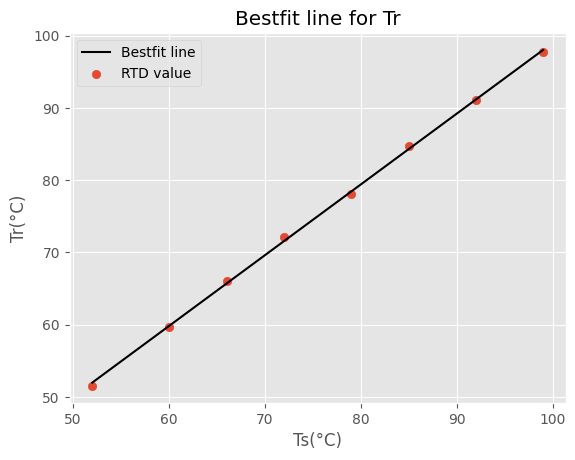

In [39]:
input_data = dfsrtd["Real(celcius)"].values
measurement_data = dfsrtd["TR"].values
#find slope and intercept of the line
slope,intercept = np.polyfit(input_data,measurement_data, 1)

# Create the least squares line
line = slope * input_data + intercept

# Plot the data points and the least squares line
plt.plot(input_data, line, color='black', label='Bestfit line')
plt.scatter(input_data, dfsrtd["TR"], label='RTD value')

# Add labels and legend
plt.xlabel('Ts(°C)')
plt.ylabel('Tr(°C)')
plt.title('Bestfit line for Tr')
plt.legend()

# Show the plot
plt.show()

dfsrtd["bestfit"] = dfsrtd["Real(celcius)"] * slope + intercept

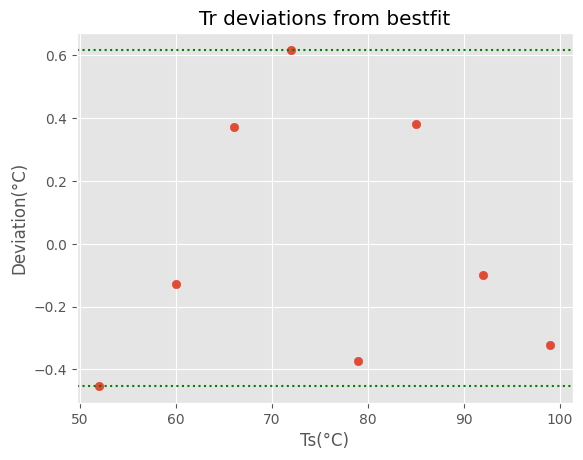

In [40]:
dfsrtd["deviation"] = dfsrtd["TR"] - dfsrtd["bestfit"]
plt.scatter(dfsrtd["Real(celcius)"], dfsrtd["deviation"],marker='o')
plt.axhline(y=max(dfsrtd["deviation"]), color='green', linestyle=':')
plt.axhline(y=min(dfsrtd["deviation"]), color='green', linestyle=':')
plt.xlabel('Ts(°C)')
plt.ylabel('Deviation(°C)')
plt.title("Tr deviations from bestfit")
plt.show()

In [41]:
output_span_Tr = dfsrtd.at[7,"bestfit"] - dfsrtd.at[0,"bestfit"]
dfsrtd["accuracy %"] = dfsrtd["deviation"] / output_span_Tr * 100
max_rtd_accuracy = max(dfsrtd["accuracy %"])
min_rtd_accuracy = min(dfsrtd["accuracy %"])
print("max positive accuracy percentage is:",max_rtd_accuracy)
print("max negative accuracy percentage is:",min_rtd_accuracy)

max positive accuracy percentage is: 1.3413241575195292
max negative accuracy percentage is: -0.9825961613025194


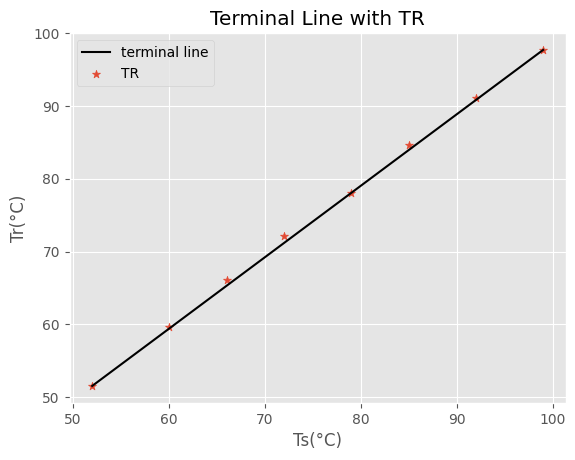

,Real(celcius),RTD(OHM),TR,bestfit,deviation,accuracy %,terminal line
0,52,120.2,51.530612,51.983040,-0.452428,-0.982596,51.530612
1,60,123.4,59.693878,59.820335,-0.126457,-0.274643,59.389926
2,66,125.9,66.071429,65.698306,0.373123,0.810360,65.284412
3,72,128.3,72.193878,71.576277,0.617601,1.341324,71.178897
4,79,130.6,78.061224,78.433910,-0.372685,-0.809409,78.055797
5,85,133.2,84.693878,84.311881,0.381997,0.829632,83.950282
6,92,135.7,91.071429,91.169514,-0.098085,-0.213024,90.827182
7,99,138.3,97.704082,98.027147,-0.323065,-0.701643,97.704082


In [42]:
x1,x2 = dfsrtd.at[0,"Real(celcius)"], dfsrtd.at[7,"Real(celcius)"]
y1,y2 = dfsrtd.at[0,"TR"], dfsrtd.at[7,"TR"]
slope2, intercept2 = np.polyfit([x1, x2], [y1, y2], 1)
input_data2 = dfs["Real(celcius)"].values
line2 = slope2 * input_data + intercept2
plt.plot(input_data2, line2, color='black', label='terminal line')
plt.scatter(dfsrtd["Real(celcius)"], dfsrtd["TR"], label='TR',marker='*')

# Add labels and legend
plt.xlabel('Ts(°C)')
plt.ylabel('Tr(°C)')
plt.title('Terminal Line with TR')
plt.legend()

# Show the plot
plt.show()

dfsrtd["terminal line"] = dfsrtd["Real(celcius)"] * slope2 + intercept2
dfsrtd

COMP

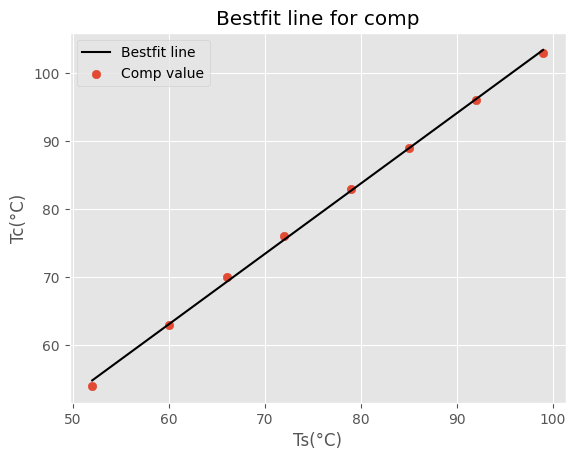

In [43]:
dfscomp = dfs[["Real(celcius)","COMP(celcius)"]]
input_data3 = dfscomp["Real(celcius)"].values
measurement_data3 = dfscomp["COMP(celcius)"].values
#find slope and intercept of the line
slope3,intercept3 = np.polyfit(input_data3,measurement_data3, 1)

# Create the least squares line
line3 = slope3 * input_data3 + intercept3

# Plot the data points and the least squares line
plt.plot(input_data3, line3, color='black', label='Bestfit line')
plt.scatter(input_data3, dfscomp["COMP(celcius)"], label='Comp value')

# Add labels and legend
plt.xlabel('Ts(°C)')
plt.ylabel('Tc(°C)')
plt.title('Bestfit line for comp')
plt.legend()

# Show the plot
plt.show()

dfscomp["bestfit"] = dfscomp["Real(celcius)"] * slope3 + intercept3

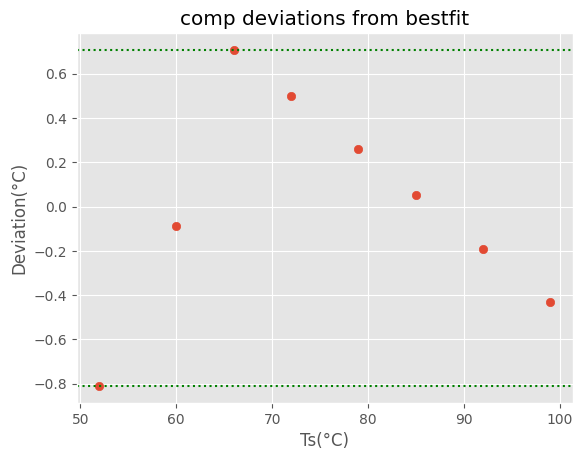

,Real(celcius),COMP(celcius),bestfit,deviation
0,52,54,54.809674,-0.809674
1,60,63,63.085763,-0.085763
2,66,70,69.292830,0.707170
3,72,76,75.499897,0.500103
4,79,83,82.741475,0.258525
5,85,89,88.948542,0.051458
6,92,96,96.190120,-0.190120
7,99,103,103.431698,-0.431698


In [44]:
dfscomp["deviation"] = dfscomp["COMP(celcius)"] - dfscomp["bestfit"]
plt.scatter(dfscomp["Real(celcius)"], dfscomp["deviation"],marker='o')
plt.axhline(y=max(dfscomp["deviation"]), color='green', linestyle=':')
plt.axhline(y=min(dfscomp["deviation"]), color='green', linestyle=':')
plt.xlabel('Ts(°C)')
plt.ylabel('Deviation(°C)')
plt.title("comp deviations from bestfit")
plt.show()
dfscomp

In [45]:
output_span_comp = dfscomp.at[7,"bestfit"] - dfscomp.at[0,"bestfit"]
dfscomp["accuracy %"] = dfscomp["deviation"] / output_span_comp * 100
max_comp_accuracy = max(dfscomp["accuracy %"])
min_comp_accuracy = min(dfscomp["accuracy %"])
print("max positive accuracy percentage is:",max_comp_accuracy)
print("max negative accuracy percentage is:",min_comp_accuracy)

max positive accuracy percentage is: 1.4544228169546691
max negative accuracy percentage is: -1.6652414536608213


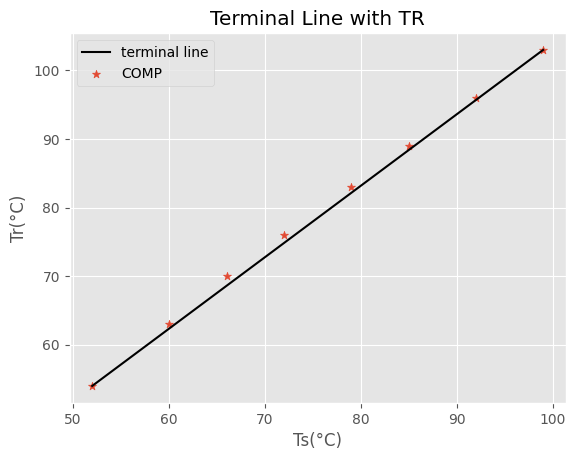

,Real(celcius),COMP(celcius),bestfit,deviation,accuracy %,terminal line
0,52,54,54.809674,-0.809674,-1.665241,54.000000
1,60,63,63.085763,-0.085763,-0.176388,62.340426
2,66,70,69.292830,0.707170,1.454423,68.595745
3,72,76,75.499897,0.500103,1.028552,74.851064
4,79,83,82.741475,0.258525,0.531703,82.148936
5,85,89,88.948542,0.051458,0.105833,88.404255
6,92,96,96.190120,-0.190120,-0.391016,95.702128
7,99,103,103.431698,-0.431698,-0.887865,103.000000


In [46]:
x1,x2 = dfscomp.at[0,"Real(celcius)"], dfsrtd.at[7,"Real(celcius)"]
y1,y2 = dfscomp.at[0,"COMP(celcius)"], dfscomp.at[7,"COMP(celcius)"]
slope4, intercept4 = np.polyfit([x1, x2], [y1, y2], 1)
input_data4 = dfs["Real(celcius)"].values
line4 = slope4 * input_data4 + intercept4
plt.plot(input_data4, line4, color='black', label='terminal line')
plt.scatter(dfscomp["Real(celcius)"], dfscomp["COMP(celcius)"], label='COMP',marker='*')

# Add labels and legend
plt.xlabel('Ts(°C)')
plt.ylabel('Tr(°C)')
plt.title('Terminal Line with TR')
plt.legend()

# Show the plot
plt.show()

dfscomp["terminal line"] = dfscomp["Real(celcius)"] * slope4 + intercept4
dfscomp

UNCOMP(mv)

In [47]:
dfu = dfs[["Real(celcius)","UNCOMP(mV)"]]
dfu.at[0,"Tu"] = (dfu.at[0,"UNCOMP(mV)"] - 2.064) / (2.106 - 2.064) + 51
dfu.at[1,"Tu"] = (dfu.at[1,"UNCOMP(mV)"] - 2.395) / (2.436 - 2.395) + 59
dfu.at[2,"Tu"] = (dfu.at[2,"UNCOMP(mV)"] - 2.644) / (2.685 - 2.644) + 65
dfu.at[3,"Tu"] = (dfu.at[3,"UNCOMP(mV)"] - 2.934) / (2.976 - 2.934) + 72
dfu.at[4,"Tu"] = (dfu.at[4,"UNCOMP(mV)"] - 3.184) / (3.225 - 3.184) + 78
dfu.at[5,"Tu"] = (dfu.at[5,"UNCOMP(mV)"] - 3.433) / (3.474 - 3.433) + 84
dfu.at[6,"Tu"] = (dfu.at[6,"UNCOMP(mV)"] - 3.723) / (3.765 - 3.723) + 91
dfu.at[7,"Tu"] = (dfu.at[7,"UNCOMP(mV)"] - 4.013) / (4.055 - 4.013) + 98
dfu

,Real(celcius),UNCOMP(mV),Tu
0,52,2.08,51.380952
1,60,2.42,59.609756
2,66,2.68,65.878049
3,72,2.95,72.380952
4,79,3.21,78.634146
5,85,3.47,84.902439
6,92,3.73,91.166667
7,99,4.03,98.404762


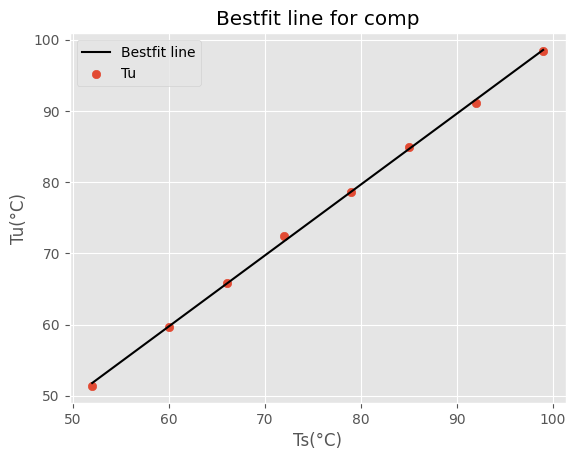

In [48]:
input_data5 = dfu["Real(celcius)"].values
measurement_data5 = dfu["Tu"].values
#find slope and intercept of the line
slope5,intercept5 = np.polyfit(input_data5,measurement_data5, 1)

# Create the least squares line
line5 = slope5 * input_data5 + intercept5

# Plot the data points and the least squares line
plt.plot(input_data5, line5, color='black', label='Bestfit line')
plt.scatter(input_data5, dfu["Tu"], label='Tu')

# Add labels and legend
plt.xlabel('Ts(°C)')
plt.ylabel('Tu(°C)')
plt.title('Bestfit line for comp')
plt.legend()

# Show the plot
plt.show()

dfu["bestfit"] = dfu["Real(celcius)"] * slope5 + intercept5

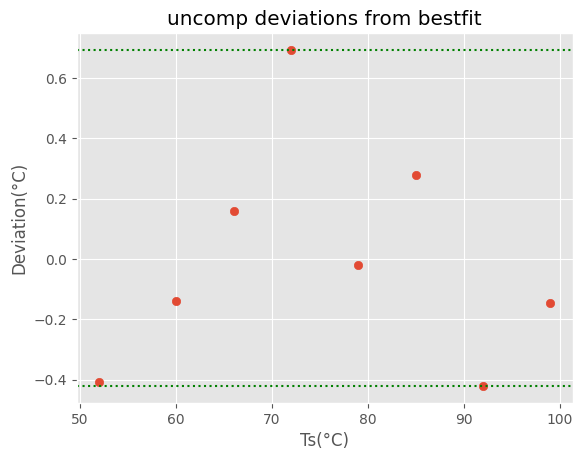

,Real(celcius),UNCOMP(mV),Tu,bestfit,deviation
0,52,2.08,51.380952,51.788932,-0.407979
1,60,2.42,59.609756,59.748562,-0.138806
2,66,2.68,65.878049,65.718285,0.159764
3,72,2.95,72.380952,71.688008,0.692944
4,79,3.21,78.634146,78.652685,-0.018538
5,85,3.47,84.902439,84.622407,0.280032
6,92,3.73,91.166667,91.587084,-0.420417
7,99,4.03,98.404762,98.551761,-0.146999


In [49]:
dfu["deviation"] = dfu["Tu"] - dfu["bestfit"]
plt.scatter(dfu["Real(celcius)"], dfu["deviation"],marker='o')
plt.axhline(y=max(dfu["deviation"]), color='green', linestyle=':')
plt.axhline(y=min(dfu["deviation"]), color='green', linestyle=':')
plt.xlabel('Ts(°C)')
plt.ylabel('Deviation(°C)')
plt.title("uncomp deviations from bestfit")
plt.show()
dfu

In [50]:
output_span_uncomp = dfu.at[7,"bestfit"] - dfu.at[0,"bestfit"]
dfu["accuracy %"] = dfu["deviation"] / output_span_uncomp * 100
max_uncomp_accuracy = max(dfu["accuracy %"])
min_uncomp_accuracy = min(dfu["accuracy %"])
print("max positive accuracy percentage is:",max_uncomp_accuracy)
print("max negative accuracy percentage is:",min_uncomp_accuracy)

max positive accuracy percentage is: 1.4818275813150599
max negative accuracy percentage is: -0.8990419290757298


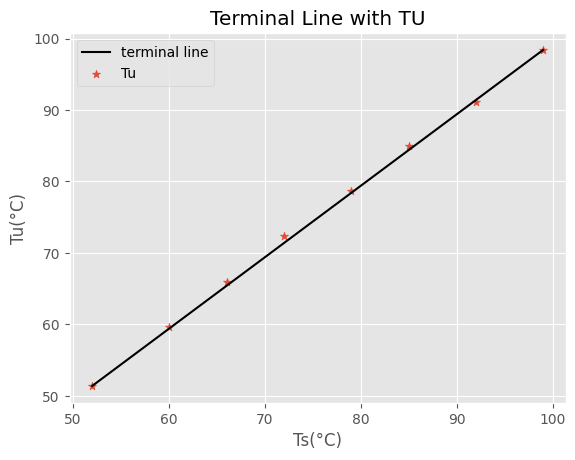

,Real(celcius),UNCOMP(mV),Tu,bestfit,deviation,accuracy %,terminal line
0,52,2.08,51.380952,51.788932,-0.407979,-0.872444,51.380952
1,60,2.42,59.609756,59.748562,-0.138806,-0.296830,59.385005
2,66,2.68,65.878049,65.718285,0.159764,0.341647,65.388045
3,72,2.95,72.380952,71.688008,0.692944,1.481828,71.391084
4,79,3.21,78.634146,78.652685,-0.018538,-0.039643,78.394630
5,85,3.47,84.902439,84.622407,0.280032,0.598834,84.397670
6,92,3.73,91.166667,91.587084,-0.420417,-0.899042,91.401216
7,99,4.03,98.404762,98.551761,-0.146999,-0.314350,98.404762


In [51]:
x1,x2 = dfu.at[0,"Real(celcius)"], dfu.at[7,"Real(celcius)"]
y1,y2 = dfu.at[0,"Tu"], dfu.at[7,"Tu"]
slope6, intercept6 = np.polyfit([x1, x2], [y1, y2], 1)
input_data6 = dfu["Real(celcius)"].values
line6 = slope6 * input_data6 + intercept6
plt.plot(input_data6, line6, color='black', label='terminal line')
plt.scatter(dfu["Real(celcius)"], dfu["Tu"], label='Tu',marker='*')

# Add labels and legend
plt.xlabel('Ts(°C)')
plt.ylabel('Tu(°C)')
plt.title('Terminal Line with TU')
plt.legend()

# Show the plot
plt.show()

dfu["terminal line"] = dfu["Real(celcius)"] * slope6 + intercept6
dfu